In [ ]:
%pip install numpy matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Что такое математический нейрон
По аналогии с биологическим нейроном в 1943 году нейрофизиолог Уоррен Маккалок (Warren Sturgis McCulloch) и математик Уолтер Питтс (Walter Harry Pitts) создали математическую модель нейрона.

Он имеет, в общем случае, множество входов и один выход. На входы нейрона поступают сигналы от внешних источников или с выходов других нейронов. Эти сигналы, как правило, должны быть нормализованы в заданных пределах, например, от 0 до 1. 

![Математический нейрон](neuron.png)

Входные сигналы дальше проводятся в тело нейрона по синаптическим связям. Синапсы могут усиливать или ослаблять сигнал определённого входа, а также делать его влияние положительным или отрицательным, что достигается умножением сигнала на соответствующий синаптический (весовой) коэффициент. 

Взвешенные сигналы суммируются в теле нейрона, формируя таким образом его состояние. Выход нейрона получается в результате применения активационной (передаточной) функции к рассчитанному состоянию.  Полученный выход может быть как выходом нейронной сети в целом, так и подаваться на входы других слоёв нейронов, в том числе предыдущие слои.

Главная цель функции активации - внедрение нелинейности в модель нейронной сети. Наличие нелинейности позволяет нейронным сетям разрабатывать сложные представления и функции на основе входных данных, что было бы невозможно при использовании простых линейных функциях, ведь композиция линейных функций есть линейная функция. Также, функция активации используется для нормализации значения выхода нейрона от 0 до 1 (в отдельных случаях от -1 до 1). В зависимости от типа значение функции активации может быть дискретно - 0 или 1 (функция ReLU), либо непрерывно изменяться от 0 до 1 (сигмоида).

В зависимости от класса нейронной сети некоторые нейроны могут иметь всего один вход, а функция активации может отсутствовать, формально выдавая как результат значение аргумента.


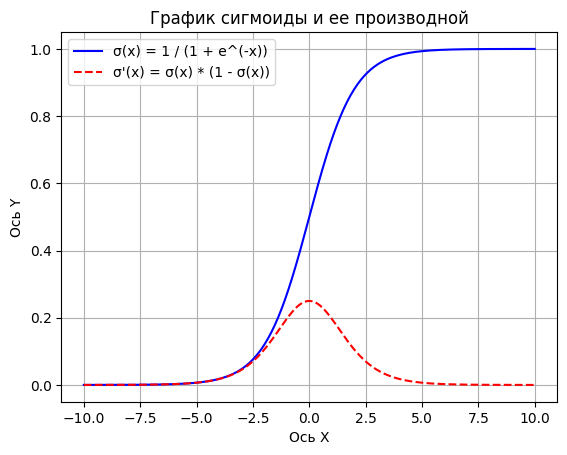

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10, 10, 400)
y_sigmoid = sigmoid(x)
y_derivative = sigmoid_derivative(x)

plt.plot(x, y_sigmoid, label="σ(x) = 1 / (1 + e^(-x))", color="blue")
plt.plot(x, y_derivative, label="σ'(x) = σ(x) * (1 - σ(x))", color='red', linestyle='--')
plt.title("График сигмоиды и ее производной")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")

plt.legend()
plt.grid(True)
plt.show()


## Процесс обучения
Рассмотрим процесс обучения на примере нейрона с тремя входами и одним выходом. В качестве функции активации нейрона будем использовать сигмоиду.

Перед началом обучения веса и смещение инициализируются случайным образом. Определям некоторое значение правильного ответа $y_{\text{true}}$.

### 1. Рассчитывается выход нейрона
Нейрон принимает три входа $x_1, x_2, x_3$, умножает их на соответствующие веса $w_1, w_2, w_3$, добавляет смещение $b$ и применяет функцию активации сигмоида:

$$
y = \sigma(w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b)
$$

где $\sigma$ - сигмоида:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
### 2. Вычисление ошибки (Loss)
Ошибка вычисляется как квадрат разницы между предсказанием $y$ и правильным ответом $y_{\text{true}}$:

$$
\text{Ошибка} = (y - y_{\text{true}})^2
$$

### 3. Определение градиента ошибки по весам и смещению
Чтобы понять, как изменить веса, нужно вычислить, как ошибка зависит от каждого веса. Это делается с помощью цепного правила (chain rule) из математического анализа. Градиент — направление, в котором нужно изменить веса нейрона, чтобы уменьшить ошибку.

Градиент ошибки по каждому весу и смещению вычисляется с помощью цепного правила.

Для каждого веса $w_i$:
$$
\frac{\partial \text{Ошибка}}{\partial w_i} = 2(y - y_{\text{true}}) \cdot \sigma'(z) \cdot x_i
$$

Для смещения $b$:
$$
\frac{\partial \text{Ошибка}}{\partial b} = 2(y - y_{\text{true}}) \cdot \sigma'(z)
$$

### 5. Обновление весов и смещения
Веса и смещение обновляются с учетом градиента и скорости обучения $\alpha$.

Для каждого веса $w_i$:
$$
w_i = w_i - \alpha \cdot \frac{\partial \text{Ошибка}}{\partial w_i}
$$

Для смещения $b$:
$$
b = b - \alpha \cdot \frac{\partial \text{Ошибка}}{\partial b}
$$

### 6. Повторение с шага 1
Этот процесс повторяется много раз, пока ошибка не станет достаточно маленькой.


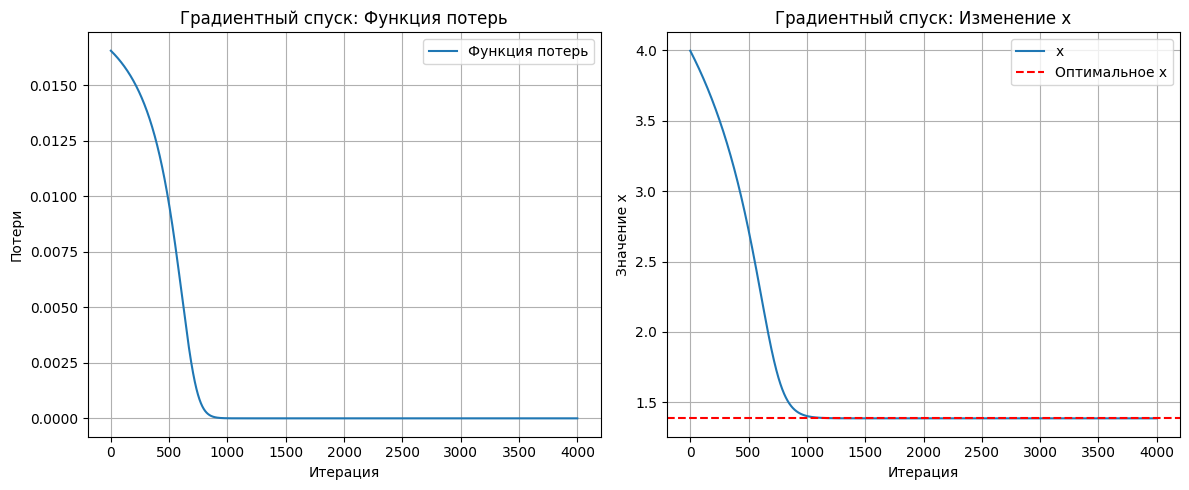

In [5]:
# Функция потерь (квадратичная ошибка)
def loss(y_true, y_pred):
    return 0.5 * (y_true - y_pred)**2

# Градиент функции потерь по параметру x
def gradient(y_true, y_pred, x):
    return (y_pred - y_true) * sigmoid_derivative(x)

# Параметры градиентного спуска
learning_rate = 0.5  # Скорость обучения
iterations = 4000     # Количество итераций
x = 4.0              # Начальное значение x
y_true = 0.8         # Целевое значение (желаемый выход сигмоиды)

# Списки для хранения истории значений
x_history = []
loss_history = []

# Градиентный спуск
for i in range(iterations):
    y_pred = sigmoid(x)  # Предсказанное значение
    l = loss(y_true, y_pred)  # Значение функции потерь
    grad = gradient(y_true, y_pred, x)  # Градиент
    
    # Обновляем x
    x = x - learning_rate * grad
    
    # Сохраняем историю
    x_history.append(x)
    loss_history.append(l)

# Визуализация
plt.figure(figsize=(12, 5))

# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Функция потерь')
plt.xlabel('Итерация')
plt.ylabel('Потери')
plt.title('Градиентный спуск: Функция потерь')
plt.legend()
plt.grid(True)

# График изменения x
plt.subplot(1, 2, 2)
plt.plot(x_history, label='x')
plt.axhline(y=np.log(y_true / (1 - y_true)), color='red', linestyle='--', label='Оптимальное x')
plt.xlabel('Итерация')
plt.ylabel('Значение x')
plt.title('Градиентный спуск: Изменение x')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Пример реализации нейронной сети на Python

Объявляем класс `SimpleNeuralNetwork`.

In [7]:
class SimpleNeuralNetwork:
    def __init__(self):
        # Инициализация весов случайными значениями
        self.weights = np.random.randn(3)
        self.bias = np.random.randn()


    def sigmoid(self, x):
        # Функция активации - сигмоида
        return 1 / (1 + np.exp(-x))
    

    def sigmoid_derivative(self, x):
        # Производная сигмоиды
        return x * (1 - x)
    
    
    def predict(self, inputs):
        # Прямой проход - вычисление выхода
        network_input = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(network_input)
    

    def train(self, training_inputs, training_outputs, epochs=1000, learning_rate=0.1):
        # Обучение с помощью градиентного спуска
        for _ in range(epochs):
            # Прямой проход
            outputs = self.predict(training_inputs)

            # Вычисление ошибки
            error = training_outputs - outputs

            # Градиентный спуск
            adjustments = error * self.sigmoid_derivative(outputs)
            self.weights += learning_rate * np.dot(training_inputs.T, adjustments)
            self.bias += learning_rate * np.sum(adjustments)


Создаем экземпляр класса

In [8]:
nn = SimpleNeuralNetwork()
print("Веса:", nn.weights, "Смещение:", nn.bias)

Веса: [-1.69769332  0.2365739  -1.66072027] Смещение: -1.1848534543681686


Подготовим обучающие даннные. 

`training_inputs` - четыре примера входных данных на три входа

`training_outputs` - ожидаемые выходные значения

In [9]:
training_inputs = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1], 
])

training_outputs = np.array([0, 1, 1, 0])

Запустим процесс обучения. Количество "эпох" (итераций) - 5000, скорость обучения - 0.1

In [10]:
nn.train(training_inputs, training_outputs, epochs=5000, learning_rate=0.1)

Проверим, изменились ли веса и смещение после обучения: 

In [11]:
print("Веса после обучения:", nn.weights, "Смещение после обучения:", nn.bias)

Веса после обучения: [ 6.54227652 -0.11535597 -1.81513968] Смещение после обучения: -1.33927287053434


Тестируем сеть по результатам обучения. В качестве входных данных подаем:
- [1, 0, 0] - результат должен быть 1.
- [1, 1, 0] - результат должен быть 1.
- [0, 0, 0] - результат должен быть 0.


In [12]:
test_input = np.array([1, 0, 0])
print("Предсказание для [1, 0, 0]", nn.predict(test_input))
test_input = np.array([1, 1, 0])
print("Предсказание для [1, 1, 0]", nn.predict(test_input))
test_input = np.array([0, 0, 0])
print("Предсказание для [0, 0, 0]", nn.predict(test_input))

Предсказание для [1, 0, 0] 0.9945300652903788
Предсказание для [1, 1, 0] 0.9938653437389005
Предсказание для [0, 0, 0] 0.2076296601656149


## Что дальше?

![Сова](sowa.png)